In [2]:
%matplotlib inline
from __future__ import print_function
import argparse, gzip, cPickle, sys, time, itertools

import autograd.numpy as np
import autograd.numpy.random as npr
import autograd.scipy.stats.norm as norm
import autograd.scipy.stats.dirichlet as dirichlet
from autograd.scipy.misc import logsumexp
from autograd.util import flatten_func, flatten
from autograd import grad, primitive
from autograd.numpy.numpy_grads import unbroadcast

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn import mixture

from  autograd.scipy.special import gammaln, digamma, gamma
from scipy import linalg
from scipy import stats, integrate

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation
import pandas as pd

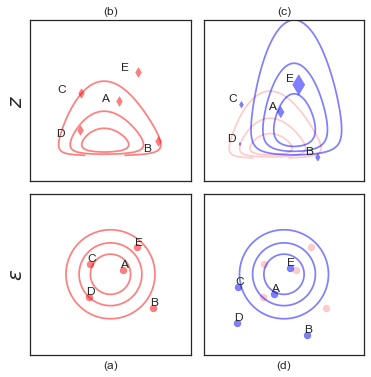

In [4]:
def softplus(x):
    return np.log(1. + np.exp(x))


def gamma_logpdf(x, alpha = 1., beta = 1.):
    return  (alpha*np.log(beta) + (alpha - 1)*np.log(x) - x*beta - gammaln(alpha))


def jacobian_softplus(x):
    return 1./(1. + np.exp(-x))

def rsoftplus(y):
    return np.log(np.exp(y) - 1)

def jacobian_rsoftplus(y):
    return np.exp(y)/(np.exp(y) -1)

sns.set_style(style='white')
n = 5
npr.seed(131)
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (5,5)) #sharex='col', sharey='row')
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()    
# # #plt.figure()
# # plt.figure(figsize = (8,6))
lab = ['A', 'B', 'C', 'D', 'E']
z = npr.randn(n*2).reshape([n,2])
s = 1.
m = 2
theta = (s* z + m)
theta[4] = np.array([3,3.])
z[4] = (theta[4] - m)/s
k = 3
k1 = -3


mu = 0.
sigma = 1.
def log_density(x):
    return np.sum(norm.logpdf(x, mu, sigma))# + np.sum(np.log(np.array([2,5])))

x = np.linspace(k1, k, 101)
y = np.linspace(k1, k, 101)
X, Y = np.meshgrid(x, y)
zs = np.array([np.exp(log_density(t))
               for t in zip(np.ravel(X), np.ravel(Y))]) 
               
Z = zs.reshape(X.shape)
ax3.contour(X, Y, Z, 3,  colors=('r'), alpha = .5)
ax3.scatter(z[:,0], z[:,1], alpha = .5, color = 'r')
ax4.scatter(z[:,0], z[:,1], color = 'r', alpha = .2)
for i, txt in enumerate(lab):
    ax3.annotate(txt, (z[i,0]- .1,z[i,1]+.1))


k = 3
k1 = -3

mu = 0.
sigma = 1.
def log_density(x):
    return np.sum(norm.logpdf(x, mu, sigma))# + np.sum(np.log(np.array([2,5])))

x = np.linspace(k1, k, 101)
y = np.linspace(k1, k, 101)
X, Y = np.meshgrid(x, y)
zs = np.array([np.exp(log_density(t))
               for t in zip(np.ravel(X), np.ravel(Y))]) 
               
Z = zs.reshape(X.shape)
ax4.contour(X, Y, Z, 3,  colors=('b'), alpha = .5)
zn = (theta - (m+.8))/(s*.9)
ax4.scatter(zn[:,0], zn[:,1], alpha = .5, color = 'b')

for i, txt in enumerate(lab):
    ax4.annotate(txt, (zn[i,0]- .1,zn[i,1]+.1))
    

def log_density(x):
    t1 = rsoftplus(x[0])
    t2 = rsoftplus(x[1])
    return np.sum(norm.logpdf(t1, m, s)) + np.log(jacobian_rsoftplus(x[1])) + \
             np.sum(gamma_logpdf(t2, m, s)) + np.log(jacobian_rsoftplus(x[1]))            


k1 = 1e-2
k = 10
x = np.linspace(.1, 4.5, 101)
y = np.linspace(1e-2, 4.5, 101)
X, Y = np.meshgrid(x, y)
zs = np.array([np.exp(log_density(t))
               for t in zip(np.ravel(X), np.ravel(Y))]) 
               
Z = zs.reshape(X.shape)

#ax1.contour(X, Y, Z , 3, alpha = .5, colors = 'b')
ax1.contour(X, Y, Z , 3, alpha = .5, colors = 'r')
ax2.contour(X, Y, Z , 3, alpha = .2, colors = 'r')
ax1.scatter(softplus(theta[:,0]), softplus(theta[:,1]), alpha = .5, color = 'r', marker = "d")
for i, txt in enumerate(lab):
    ax1.annotate(txt, ((theta[i,0]) -.4,(theta[i,1])+.1))    

        
m1 = m
s1 = s    
m = m+.8
s = s*.9
def log_density(x):
    t1 = rsoftplus(x[0])
    t2 = rsoftplus(x[1])
    return np.sum(norm.logpdf(t1, m, s)) + np.log(jacobian_rsoftplus(x[1])) + \
             np.sum(gamma_logpdf(t2, m, s)) + np.log(jacobian_rsoftplus(x[1]))            


k1 = 1e-2
k = 10
x = np.linspace(.5, 5, 101)
y = np.linspace(.5, 5, 101)
X, Y = np.meshgrid(x, y)
zs = np.array([np.exp(log_density(t))
               for t in zip(np.ravel(X), np.ravel(Y))]) 
               
Z = zs.reshape(X.shape)
ax2.contour(X, Y, Z , 3, alpha = .5, colors = 'b')
  

def log_density(z, m, s):       
    return np.sum(norm.logpdf(z, 0, 1)) + 2 * np.log(s)
    
g = np.array([log_density((t), m, s) for t in zn])
g1 = np.array([log_density((t), m1,s1) for t in z])
w = 1e2 * np.exp(g - g1)



ax2.scatter((theta[:,0]), (theta[:,1]), alpha = .5, color = 'b', marker = "d", s = w)
for i, txt in enumerate(lab):
    ax2.annotate(txt, ((theta[i,0]) -.4,(theta[i,1])+.1))
    

t = ax3.set_title('(a)')        
t.set_y(-0.12)
ax1.set_title('(b)')        
ax2.set_title('(c)')        
t = ax4.set_title('(d)')        
t.set_y(-0.12)

# k = 3
# k1 = 8
# mu = 14
# sigma = 1/.4
# def log_density(x):
# #     t1 = softplus(x[0])
# #     t2 = softplus(x[1])
#     t1 = (x[0])
#     t2 = (x[1])
#     return np.sum(gamma_logpdf(t1, mu, sigma)) + \
#             np.sum(gamma_logpdf(t2, mu, sigma)) #+ np.log(jacobian_softplus(x[1]))            

# x = np.linspace(k1, k, 101)
# y = np.linspace(k1, k, 101)
# X, Y = np.meshgrid(x, y)
# zs = np.array([np.exp(log_density(t))
#                for t in zip(np.ravel(X), np.ravel(Y))]) 
               
# Z = zs.reshape(X.shape)
# ax2.contour(X, Y, Z , 3, alpha = .5, colors = 'b')



# ax2.scatter(softplus(theta[:,0]), softplus(theta[:,1]), alpha = .5, color = 'b', marker = "d", s = w)
# for i, txt in enumerate(lab):
#     ax2.annotate(txt, (softplus(theta[i,0]) -.3,softplus(theta[i,1])+.2))

ax1.set_ylabel(r'$z$', fontsize = 20)    
ax3.set_ylabel(r'$\epsilon$', fontsize = 20)    
#ax1.yaxis.set_label_coords(1.05, -0.025)
plt.savefig('/home/sakaya/MUPI/papers/uai17importance/importance1.png', bbox_inches='tight')

